# Importing Libraries


In [1]:
import pandas as pd
import tqdm as tqdm

In [2]:
train_data=pd.read_csv(r'C:\Users\rctuh\Desktop\amazon_ml_challenge\dataset\train.csv')
test_data=pd.read_csv(r'C:\Users\rctuh\Desktop\amazon_ml_challenge\dataset\test.csv')
validation_data=pd.read_csv(r'C:\Users\rctuh\Desktop\amazon_ml_challenge\dataset\sample_submission.csv')

# Doing EDA on the Dataset 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
print(train_data.head())
print("The Shape of the Training Data is : " ,train_data.shape)

   PRODUCT_ID                                              TITLE  \
0     1925202  ArtzFolio Tulip Flowers Blackout Curtain for D...   
1     2673191  Marks & Spencer Girls' Pyjama Sets T86_2561C_N...   
2     2765088  PRIKNIK Horn Red Electric Air Horn Compressor ...   
3     1594019  ALISHAH Women's Cotton Ankle Length Leggings C...   
4      283658  The United Empire Loyalists: A Chronicle of th...   

                                       BULLET_POINTS  \
0  [LUXURIOUS & APPEALING: Beautiful custom-made ...   
1  [Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...   
2  [Loud Dual Tone Trumpet Horn, Compatible With ...   
3  [Made By 95%cotton and 5% Lycra which gives yo...   
4                                                NaN   

                                         DESCRIPTION  PRODUCT_TYPE_ID  \
0                                                NaN             1650   
1                                                NaN             2755   
2  Specifications: Color: Red, Mate

In [5]:
print(test_data.head())
print("The Shape of the Testing Data is : " ,test_data.shape)

   PRODUCT_ID                                              TITLE  \
0      604373  Manuel d'Héliogravure Et de Photogravure En Re...   
1     1729783  DCGARING Microfiber Throw Blanket Warm Fuzzy P...   
2     1871949  I-Match Auto Parts Front License Plate Bracket...   
3     1107571  PinMart Gold Plated Excellence in Service 1 Ye...   
4      624253  Visual Mathematics, Illustrated by the TI-92 a...   

                                       BULLET_POINTS  \
0                                                NaN   
1  [QUALITY GUARANTEED: Luxury cozy plush polyest...   
2  [Front License Plate Bracket Made Of Plastic,D...   
3  [Available as a single item or bulk packed. Se...   
4                                                NaN   

                                         DESCRIPTION  PRODUCT_TYPE_ID  
0                                                NaN             6142  
1  <b>DCGARING Throw Blanket</b><br><br> <b>Size ...             1622  
2  Replacement for The Following Vehic

### Just Exploring the Training Data

In [6]:
train_data.dtypes


PRODUCT_ID           int64
TITLE               object
BULLET_POINTS       object
DESCRIPTION         object
PRODUCT_TYPE_ID      int64
PRODUCT_LENGTH     float64
dtype: object

In [26]:
train_data.isnull().sum()

product_id         0
title              0
bullet_points      0
description        0
product_type_id    0
product_length     0
dtype: int64

In [8]:
train_data.duplicated().sum()


0

In [9]:
#Droppping Nan values
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

In [10]:
train_data.describe()

,PRODUCT_ID,PRODUCT_TYPE_ID,PRODUCT_LENGTH
count,1.038460e+06,1.038460e+06,1.038460e+06
mean,2.042501e+06,5.170455e+03,6.713314e+03
std,6.280456e+05,3.928656e+03,1.985306e+06
min,8.000000e+00,0.000000e+00,1.000000e+00
25%,1.537351e+06,2.197000e+03,4.330709e+02
50%,2.102976e+06,3.278000e+03,7.086614e+02
75%,2.597901e+06,7.978000e+03,1.200000e+03
max,2.999997e+06,1.342000e+04,1.885801e+09


In [39]:
sns.histplot(train_data['PRODUCT_LENGTH'])
plt.show()

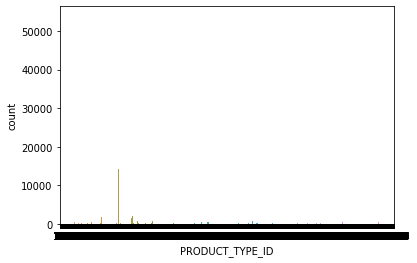

In [11]:
for col in ['PRODUCT_TYPE_ID']:
    sns.countplot(x=col, data=train_data)
    plt.show()

# Data Preprocessing

In [12]:
train_data.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996,787.401574
5,2152929,HINS Metal Bucket Shape Plant Pot for Indoor &...,"[Simple and elegant, great for displaying indo...",HINS Brings you the most Elegant Looking Pot w...,5725,950.000000
7,2026580,Delavala Self Adhesive Kitchen Backsplash Wall...,[HIGH QUALITY PVC MATERIAL: The kitchen alumin...,<p><strong>Aluminum Foil Stickers-good kitchen...,6030,984.251967
9,2998633,Hexwell Essential oil for Home Fragrance Oil A...,[100% Pure And Natural Essential Oil Or Fragra...,"Transform your home, workplace or hotel room i...",8201,393.700787


In [13]:
train_data.shape

(1038460, 6)

## Preprocessing the Product Desciption Column

In [14]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('omw-1.4')

In [21]:
def preprocess_text(text):
    # convert text to lowercase
    text = text.lower()
    
    # remove HTML tags
    text = re.sub('<.*?>', '', text)
    
    # remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # tokenize the text
    tokens = word_tokenize(text)
    
    # remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # join the tokens back into a string
    text = ' '.join(tokens)
    
    return text

In [17]:
from tqdm import tqdm

In [ ]:
total_iterations = len(train_data['DESCRIPTION'])

for text in tqdm(train_data['DESCRIPTION'], total=total_iterations):
    preprocessed_text = preprocess_text(text)

100%|██████████| 1038460/1038460 [13:27<00:00, 1286.16it/s]


In [ ]:
##train_data['DESCRIPTION'] = train_data['DESCRIPTION'].apply(preprocess_text)

In [ ]:
print(train_data['DESCRIPTION'].head())

2    Specifications: Color: Red, Material: Aluminiu...
3    AISHAH Women's Lycra Cotton Ankel Leggings. Br...
5    HINS Brings you the most Elegant Looking Pot w...
7    <p><strong>Aluminum Foil Stickers-good kitchen...
9    Transform your home, workplace or hotel room i...
Name: DESCRIPTION, dtype: object


In [22]:
train_data.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996,787.401574
5,2152929,HINS Metal Bucket Shape Plant Pot for Indoor &...,"[Simple and elegant, great for displaying indo...",HINS Brings you the most Elegant Looking Pot w...,5725,950.000000
7,2026580,Delavala Self Adhesive Kitchen Backsplash Wall...,[HIGH QUALITY PVC MATERIAL: The kitchen alumin...,<p><strong>Aluminum Foil Stickers-good kitchen...,6030,984.251967
9,2998633,Hexwell Essential oil for Home Fragrance Oil A...,[100% Pure And Natural Essential Oil Or Fragra...,"Transform your home, workplace or hotel room i...",8201,393.700787


In [23]:
train_data.columns

Index(['PRODUCT_ID', 'TITLE', 'BULLET_POINTS', 'DESCRIPTION',
       'PRODUCT_TYPE_ID', 'PRODUCT_LENGTH'],
      dtype='object')

# Renaming the Columns 
### Just a cosmetic change

In [24]:
train_data = train_data.rename(columns={'PRODUCT_ID': 'product_id', 'TITLE': 'title', 'BULLET_POINTS': 'bullet_points', 'DESCRIPTION': 'description', 'PRODUCT_TYPE_ID': 'product_type_id', 'PRODUCT_LENGTH': 'product_length'})

In [25]:
train_data.columns

Index(['product_id', 'title', 'bullet_points', 'description',
       'product_type_id', 'product_length'],
      dtype='object')

# Preprocessing the bullet points

In [27]:
#pip install autocorrect

In [28]:
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from autocorrect import Speller

In [29]:
import multiprocessing

In [30]:
# function to preprocess bullet points
def preprocess_bp(text):
    # convert text to lowercase
    text = text.lower()

    # remove HTML tags
    text = re.sub('<.*?>', '', text)

    # remove URLs and email addresses
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'http\S+', '', text)

    # remove non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # tokenize the text
    tokens = word_tokenize(text)

    # remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # spell correction
    spell = Speller(lang='en')
    tokens = [spell(word) for word in tokens]

    # stemming
    stemmer = SnowballStemmer('english')
    tokens = [stemmer.stem(word) for word in tokens]

    # join the tokens back into a string
    text = ' '.join(tokens)

    return text


In [32]:
# function to preprocess text data in chunks
def preprocess_data_in_chunks(data, chunk_size):
    # get number of available processors
    num_processors = multiprocessing.cpu_count()

    # create multiprocessing pool
    pool = multiprocessing.Pool(processes=num_processors)

    # get number of chunks
    num_chunks = int(len(data) / chunk_size) + 1

    # process data in chunks
    for i in tqdm(range(num_chunks)):
        start = i * chunk_size
        end = start + chunk_size
        chunk_data = data[start:end]
        preprocessed_data = pool.map(preprocess_bp, chunk_data)
        data[start:end] = preprocessed_data

    # close multiprocessing pool
    pool.close()

    return data


In [33]:
# preprocess bullet points in chunks
chunk_size = 5000
train_data['bullet_points'] = preprocess_data_in_chunks(list(train_data['bullet_points']), chunk_size)


  0%|          | 0/208 [00:00<?, ?it/s]

In [ ]:
train_data['bullet_points'].head()

2    [Loud Dual Tone Trumpet Horn, Compatible With ...
3    [Made By 95%cotton and 5% Lycra which gives yo...
5    [Simple and elegant, great for displaying indo...
7    [HIGH QUALITY PVC MATERIAL: The kitchen alumin...
9    [100% Pure And Natural Essential Oil Or Fragra...
Name: bullet_points, dtype: object

In [ ]:
#train_data.to_csv('processed_data.csv', index=False)

In [1]:
train_data.head()

NameError: name 'train_data' is not defined

In [ ]:
#pip install emoji

In [ ]:
#import emoji

In [ ]:
#from tqdm import tqdm

In [ ]:
def remove_emojis(text):
    cleaned_text = re.sub(r'@[A-Za-z0-9]+', '', str(text)) # remove @mentions
    cleaned_text = re.sub(r'#\w+', '', cleaned_text) # remove hashtags
    cleaned_text = re.sub(r'RT[\s]+', '', cleaned_text) # remove RT
    cleaned_text = re.sub(r'http\S+', '', cleaned_text) # remove URLs
    cleaned_text = re.sub(r'www\S+', '', cleaned_text) # remove the www
    cleaned_text = re.sub(r'twitter+', '', cleaned_text) # remove the twitter
    cleaned_text = re.sub(r'pic+', '', cleaned_text) # remove the pic
    cleaned_text = re.sub(r'com', '', cleaned_text) # remove the com
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    cleaned_text = emoji_pattern.sub(r'', text)
    return cleaned_text

In [ ]:
for text in tqdm(train_data['bullet_points']):
    processed_text = remove_emojis(text)


100%|██████████| 1038460/1038460 [00:20<00:00, 51896.05it/s]


In [ ]:
train_data.head()

,product_id,title,bullet_points,description,product_type_id,product_length
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...",specification color red material aluminium vol...,7537,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,aishah woman lycra cotton ankel legging brand ...,2996,787.401574
5,2152929,HINS Metal Bucket Shape Plant Pot for Indoor &...,"[Simple and elegant, great for displaying indo...",hin brings elegant looking pot stand durable l...,5725,950.000000
7,2026580,Delavala Self Adhesive Kitchen Backsplash Wall...,[HIGH QUALITY PVC MATERIAL: The kitchen alumin...,aluminum foil stickersgood kitchen helper mom ...,6030,984.251967
9,2998633,Hexwell Essential oil for Home Fragrance Oil A...,[100% Pure And Natural Essential Oil Or Fragra...,transform home workplace hotel room personal a...,8201,393.700787


In [ ]:
train_data.to_csv('processed_data_emoji.csv', index=False)

## Preprocessing the Test Data

In [ ]:
test_data.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID
0,604373,Manuel d'Héliogravure Et de Photogravure En Re...,NaN,NaN,6142
1,1729783,DCGARING Microfiber Throw Blanket Warm Fuzzy P...,[QUALITY GUARANTEED: Luxury cozy plush polyest...,<b>DCGARING Throw Blanket</b><br><br> <b>Size ...,1622
2,1871949,I-Match Auto Parts Front License Plate Bracket...,"[Front License Plate Bracket Made Of Plastic,D...",Replacement for The Following Vehicles:2020 LE...,7540
3,1107571,PinMart Gold Plated Excellence in Service 1 Ye...,[Available as a single item or bulk packed. Se...,Our Excellence in Service Lapel Pins feature a...,12442
4,624253,"Visual Mathematics, Illustrated by the TI-92 a...",NaN,NaN,6318


In [ ]:
test_data.shape

(734736, 5)

In [ ]:
#Droppping Nan values
test_data.dropna(inplace=True)

In [ ]:
test_data.shape

(337002, 5)

In [ ]:
from tqdm import tqdm

In [ ]:
total_iterations = len(test_data['DESCRIPTION'])

for text in tqdm(test_data['DESCRIPTION'], total=total_iterations):
    preprocessed_text = preprocess_text(text)

100%|██████████| 337002/337002 [04:32<00:00, 1234.63it/s]


In [ ]:
print(test_data['DESCRIPTION'].head())